<a href="https://colab.research.google.com/github/Zaripov2004/Test/blob/main/12-v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-bosqich: Loyiha nomi

## O‘zbekiston transport sohasi statistikasi

**Manbalar:**
- O‘zbekiston Respublikasi Transport vazirligi  
- O‘zbekiston Respublikasi Davlat statistika qo‘mitasi (O‘zStat)  

**Maqsad:**  
Transport turlari (yo‘l, temiryo‘l, havo, metro, yuk tashish, yo‘lovchi oqimi) bo‘yicha statistik tahlil va vizualizatsiya qilish, sohada rivojlanish tendensiyalarini ko‘rsatish.


In [1]:
# 2-bosqich: Kutubxonalarni o‘rnatish va import qilish

# Ba'zi kutubxonalar Colab’da tayyor keladi (pandas, numpy, matplotlib, seaborn)
# Qo‘shimcha kerak bo‘ladiganlarini o‘rnatib olamiz:
!pip install plotly statsmodels

# Kutubxonalarni import qilish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

# Vizualizatsiya uchun grafiklarni chiroyli ko‘rsatish
plt.style.use("seaborn-v0_8")

print("✅ Kutubxonalar tayyor!")


✅ Kutubxonalar tayyor!


# 3-bosqich: Ma’lumot manbalarini aniqlash

## Asosiy manbalar

Loyihada foydalaniladigan asosiy ma’lumotlar quyidagilardan olinadi:

1. **O‘zbekiston Respublikasi Transport vazirligi (transport.uz)**  
   - Yo‘l transporti, havo transporti, temiryo‘l, metro, jamoat transporti bo‘yicha yillik hisobotlar.  
   - Avtomobil va yo‘lovchi oqimlari, yangi loyihalar, infratuzilma ko‘rsatkichlari.

2. **O‘zbekiston Respublikasi Davlat statistika qo‘mitasi (O‘zStat, stat.uz)**  
   - Transport xizmatlari hajmi (mlrd so‘mda).  
   - Yuk tashish hajmi (mln tonnada).  
   - Yo‘lovchi tashish hajmi (mln kishi).  
   - Hududlar kesimidagi ko‘rsatkichlar.  
   - Yillik va choraklik statistik to‘plamlar.

---

## Ma’lumot formati

- **Excel (.xlsx)** – rasmiy statistik byulletenlar ko‘pincha shu formatda beriladi.  
- **CSV (.csv)** – qulay ishlash uchun Excel fayllar CSV formatga o‘tkaziladi.  
- **PDF (.pdf)** – ba’zi hisobotlar PDF shaklida beriladi (Colab’da to‘g‘ridan-to‘g‘ri ishlatish qiyin, avval Excel/CSV’ga aylantiriladi).  

---

## Loyihada qo‘llanilishi

- **Transport vazirligi ma’lumotlari** – infratuzilma va umumiy transport oqimi.  
- **O‘zStat ma’lumotlari** – aniq raqamli statistik tahlil uchun asos.  

📌 Ushbu loyihada hozircha **namunaviy sun’iy ma’lumotlar** (`transport.csv`) ishlatiladi. Keyinchalik haqiqiy ma’lumotlar bilan almashtirish mumkin.


# 4-bosqich: Ma’lumotlarni yig‘ish

Amalda quyidagi manbalardan ma’lumot olinadi:

- Transport vazirligi rasmiy sayti (transport.uz) – transport infratuzilmasi va xizmatlari.  
- O‘zStat (stat.uz) – transport xizmatlari hajmi, yuk tashish va yo‘lovchi oqimlari statistikasi.  

📌 Bu manbalardan ko‘pincha **Excel (.xlsx)** yoki **PDF (.pdf)** fayllar olinadi.  
Colab’da ishlash uchun ularni **CSV (.csv)** formatga o‘tkazish qulay.  

Hozirgi bosqichda biz **namunaviy transport.csv** faylini yasab olamiz.


In [2]:
# 4-bosqich: Namunaviy transport.csv faylini yaratish

import pandas as pd

# Sun’iy ma’lumotlar (O‘zStat ko‘rinishida)
data = {
    "Yil": [2020, 2021, 2022, 2023, 2024],
    "Yo‘lovchi_tashish_mln": [1500, 1600, 1700, 1850, 2000],   # mln kishi
    "Yuk_tashish_mln_ton": [500, 550, 600, 670, 720],          # mln tonna
    "Temiryo‘l_yo‘lovchi_mln": [80, 85, 87, 92, 95],           # mln kishi
    "Havo_yo‘lovchi_mln": [3, 3.5, 4, 4.8, 5.2],               # mln kishi
    "Metro_yo‘lovchi_mln": [220, 230, 250, 270, 300]           # mln kishi
}

# DataFrame yaratamiz
df = pd.DataFrame(data)

# CSV faylga yozamiz
df.to_csv("transport.csv", index=False)

print("✅ transport.csv fayli yaratildi!")
df.head()


✅ transport.csv fayli yaratildi!


,Yil,Yo‘lovchi_tashish_mln,Yuk_tashish_mln_ton,Temiryo‘l_yo‘lovchi_mln,Havo_yo‘lovchi_mln,Metro_yo‘lovchi_mln
0,2020,1500,500,80,3.0,220
1,2021,1600,550,85,3.5,230
2,2022,1700,600,87,4.0,250
3,2023,1850,670,92,4.8,270
4,2024,2000,720,95,5.2,300


from matplotlib import pyplot as plt
_df_0['Yil'].plot(kind='hist', bins=20, title='Yil')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Yo‘lovchi_tashish_mln'].plot(kind='hist', bins=20, title='Yo‘lovchi_tashish_mln')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Yuk_tashish_mln_ton'].plot(kind='hist', bins=20, title='Yuk_tashish_mln_ton')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Temiryo‘l_yo‘lovchi_mln'].plot(kind='hist', bins=20, title='Temiryo‘l_yo‘lovchi_mln')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Yil', y='Yo‘lovchi_tashish_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Yo‘lovchi_tashish_mln', y='Yuk_tashish_mln_ton', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Yuk_tashish_mln_ton', y='Temiryo‘l_yo‘lovchi_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Temiryo‘l_yo‘lovchi_mln', y='Havo_yo‘lovchi_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yil']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yil'}, axis=1)
              .sort_values('Yil', ascending=True))
  xs = counted['Yil']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Yil', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yil')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yo‘lovchi_tashish_mln']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yo‘lovchi_tashish_mln'}, axis=1)
              .sort_values('Yo‘lovchi_tashish_mln', ascending=True))
  xs = counted['Yo‘lovchi_tashish_mln']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Yo‘lovchi_tashish_mln', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yo‘lovchi_tashish_mln')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yuk_tashish_mln_ton']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yuk_tashish_mln_ton'}, axis=1)
              .sort_values('Yuk_tashish_mln_ton', ascending=True))
  xs = counted['Yuk_tashish_mln_ton']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Yuk_tashish_mln_ton', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yuk_tashish_mln_ton')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Temiryo‘l_yo‘lovchi_mln']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Temiryo‘l_yo‘lovchi_mln'}, axis=1)
              .sort_values('Temiryo‘l_yo‘lovchi_mln', ascending=True))
  xs = counted['Temiryo‘l_yo‘lovchi_mln']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Temiryo‘l_yo‘lovchi_mln', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Temiryo‘l_yo‘lovchi_mln')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['Yil'].plot(kind='line', figsize=(8, 4), title='Yil')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Yo‘lovchi_tashish_mln'].plot(kind='line', figsize=(8, 4), title='Yo‘lovchi_tashish_mln')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Yuk_tashish_mln_ton'].plot(kind='line', figsize=(8, 4), title='Yuk_tashish_mln_ton')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Temiryo‘l_yo‘lovchi_mln'].plot(kind='line', figsize=(8, 4), title='Temiryo‘l_yo‘lovchi_mln')
plt.gca().spines[['top', 'right']].set_visible(False)

# 5-bosqich: Ma’lumotlarni dastlabki ko‘rish

Ma’lumotlar yuklangandan keyin ularni dastlabki tahlil qilish kerak.  

Bunda quyidagilar amalga oshiriladi:
- `head()` – jadvalning birinchi 5 qatorini ko‘rish  
- `info()` – ustunlarning turi va umumiy ma’lumot  
- `describe()` – asosiy statistik ko‘rsatkichlar (min, max, mean, std)  
- `shape` – qator va ustunlar soni


In [4]:
# 5-bosqich: transport.csv faylini o‘qish va dastlabki ko‘rish

import pandas as pd

# CSV faylni o‘qish
df = pd.read_csv("transport.csv")

# Jadvalning birinchi 5 qatori
print("=== Birinchi 5 qator ===")
print(df.head())

# Umumiy ma’lumot
print("\n=== Jadval haqida ma’lumot ===")
print(df.info())

# Statistik ko‘rsatkichlar
print("\n=== Statistik xususiyatlar ===")
print(df.describe())

# Qator va ustunlar soni
print("\n=== Jadval shakli (qator, ustun) ===")
print(df.shape)


=== Birinchi 5 qator ===
    Yil  Yo‘lovchi_tashish_mln  Yuk_tashish_mln_ton  Temiryo‘l_yo‘lovchi_mln  \
0  2020                   1500                  500                       80   
1  2021                   1600                  550                       85   
2  2022                   1700                  600                       87   
3  2023                   1850                  670                       92   
4  2024                   2000                  720                       95   

   Havo_yo‘lovchi_mln  Metro_yo‘lovchi_mln  
0                 3.0                  220  
1                 3.5                  230  
2                 4.0                  250  
3                 4.8                  270  
4                 5.2                  300  

=== Jadval haqida ma’lumot ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------

# 6-bosqich: Ma’lumotlarni tozalash

Transport statistikasi faylini tozalash jarayonlari:

1. **Bo‘sh qiymatlar (NaN) ni tekshirish va to‘ldirish**
   - Yo‘q qiymatlar aniqlansa, ularni `0` yoki mos qiymat bilan to‘ldirish.

2. **Ma’lumot turlarini to‘g‘rilash**
   - Yil ustuni `int` turida bo‘lishi kerak.  
   - Transport ko‘rsatkichlari `float` yoki `int` turida bo‘lishi kerak.

3. **Noto‘g‘ri qiymatlar mavjudligini tekshirish**
   - Masalan, manfiy sonlar yoki mantiqqa to‘g‘ri kelmaydigan qiymatlar.


In [5]:
# 6-bosqich: Ma’lumotlarni tozalash

# 1. Bo‘sh qiymatlar sonini tekshirish
print("=== Bo‘sh qiymatlar soni ===")
print(df.isna().sum())

# 2. Ma’lumot turlari
print("\n=== Ustunlar turlari ===")
print(df.dtypes)

# 3. Yilni int formatga o‘tkazamiz (agar kerak bo‘lsa)
df["Yil"] = df["Yil"].astype(int)

# 4. Agar bo‘sh qiymatlar bo‘lsa, to‘ldirib qo‘yamiz
df = df.fillna(0)

# 5. Manfiy qiymatlar bor-yo‘qligini tekshirish
print("\n=== Manfiy qiymatlar soni ===")
print((df < 0).sum())

print("\n✅ Ma’lumotlar tozalandi!")
df.head()


=== Bo‘sh qiymatlar soni ===
Yil                        0
Yo‘lovchi_tashish_mln      0
Yuk_tashish_mln_ton        0
Temiryo‘l_yo‘lovchi_mln    0
Havo_yo‘lovchi_mln         0
Metro_yo‘lovchi_mln        0
dtype: int64

=== Ustunlar turlari ===
Yil                          int64
Yo‘lovchi_tashish_mln        int64
Yuk_tashish_mln_ton          int64
Temiryo‘l_yo‘lovchi_mln      int64
Havo_yo‘lovchi_mln         float64
Metro_yo‘lovchi_mln          int64
dtype: object

=== Manfiy qiymatlar soni ===
Yil                        0
Yo‘lovchi_tashish_mln      0
Yuk_tashish_mln_ton        0
Temiryo‘l_yo‘lovchi_mln    0
Havo_yo‘lovchi_mln         0
Metro_yo‘lovchi_mln        0
dtype: int64

✅ Ma’lumotlar tozalandi!


,Yil,Yo‘lovchi_tashish_mln,Yuk_tashish_mln_ton,Temiryo‘l_yo‘lovchi_mln,Havo_yo‘lovchi_mln,Metro_yo‘lovchi_mln
0,2020,1500,500,80,3.0,220
1,2021,1600,550,85,3.5,230
2,2022,1700,600,87,4.0,250
3,2023,1850,670,92,4.8,270
4,2024,2000,720,95,5.2,300


from matplotlib import pyplot as plt
_df_16['Yil'].plot(kind='hist', bins=20, title='Yil')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Yo‘lovchi_tashish_mln'].plot(kind='hist', bins=20, title='Yo‘lovchi_tashish_mln')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Yuk_tashish_mln_ton'].plot(kind='hist', bins=20, title='Yuk_tashish_mln_ton')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Temiryo‘l_yo‘lovchi_mln'].plot(kind='hist', bins=20, title='Temiryo‘l_yo‘lovchi_mln')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Yil', y='Yo‘lovchi_tashish_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Yo‘lovchi_tashish_mln', y='Yuk_tashish_mln_ton', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Yuk_tashish_mln_ton', y='Temiryo‘l_yo‘lovchi_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Temiryo‘l_yo‘lovchi_mln', y='Havo_yo‘lovchi_mln', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yil']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yil'}, axis=1)
              .sort_values('Yil', ascending=True))
  xs = counted['Yil']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Yil', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yil')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yo‘lovchi_tashish_mln']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yo‘lovchi_tashish_mln'}, axis=1)
              .sort_values('Yo‘lovchi_tashish_mln', ascending=True))
  xs = counted['Yo‘lovchi_tashish_mln']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Yo‘lovchi_tashish_mln', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yo‘lovchi_tashish_mln')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yuk_tashish_mln_ton']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yuk_tashish_mln_ton'}, axis=1)
              .sort_values('Yuk_tashish_mln_ton', ascending=True))
  xs = counted['Yuk_tashish_mln_ton']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Yuk_tashish_mln_ton', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yuk_tashish_mln_ton')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Temiryo‘l_yo‘lovchi_mln']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Temiryo‘l_yo‘lovchi_mln'}, axis=1)
              .sort_values('Temiryo‘l_yo‘lovchi_mln', ascending=True))
  xs = counted['Temiryo‘l_yo‘lovchi_mln']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Temiryo‘l_yo‘lovchi_mln', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Temiryo‘l_yo‘lovchi_mln')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_28['Yil'].plot(kind='line', figsize=(8, 4), title='Yil')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Yo‘lovchi_tashish_mln'].plot(kind='line', figsize=(8, 4), title='Yo‘lovchi_tashish_mln')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Yuk_tashish_mln_ton'].plot(kind='line', figsize=(8, 4), title='Yuk_tashish_mln_ton')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Temiryo‘l_yo‘lovchi_mln'].plot(kind='line', figsize=(8, 4), title='Temiryo‘l_yo‘lovchi_mln')
plt.gca().spines[['top', 'right']].set_visible(False)

# 7-bosqich: Transport turlari bo‘yicha ajratish va vizualizatsiya

Bu bosqichda quyidagi ishlar qilinadi:  

1. Transport turlari ajratib olinadi:  
   - Yo‘lovchi tashish (mln kishi)  
   - Yuk tashish (mln tonna)  
   - Temiryo‘l yo‘lovchilari (mln kishi)  
   - Havo yo‘lovchilari (mln kishi)  
   - Metro yo‘lovchilari (mln kishi)  

2. Har bir transport turi uchun **yillar bo‘yicha o‘sish tendensiyasi** chiziqli grafik ko‘rinishida tasvirlanadi.  

3. Bir grafikda barcha transport turlarining dinamikasi solishtiriladi.


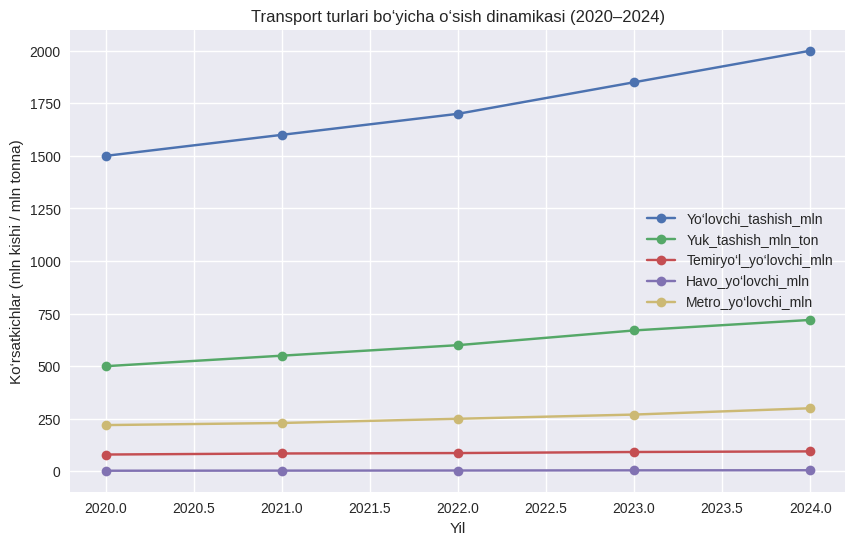

In [6]:
# 7-bosqich: Transport turlari bo‘yicha ajratish va chizish

import matplotlib.pyplot as plt

# Transport ustunlarini tanlaymiz
transport_types = [
    "Yo‘lovchi_tashish_mln",
    "Yuk_tashish_mln_ton",
    "Temiryo‘l_yo‘lovchi_mln",
    "Havo_yo‘lovchi_mln",
    "Metro_yo‘lovchi_mln"
]

# Grafik chizish
plt.figure(figsize=(10,6))
for col in transport_types:
    plt.plot(df["Yil"], df[col], marker="o", label=col)

plt.title("Transport turlari bo‘yicha o‘sish dinamikasi (2020–2024)")
plt.xlabel("Yil")
plt.ylabel("Ko‘rsatkichlar (mln kishi / mln tonna)")
plt.legend()
plt.grid(True)
plt.show()


# 8-bosqich: Yillar kesimida umumiy tahlil (Ustunli diagramma)

Bu bosqichda quyidagi ishlar amalga oshiriladi:

1. Har bir yil bo‘yicha **umumiy yo‘lovchilar soni** hisoblanadi (temiryo‘l, havo va metro yo‘lovchilarini qo‘shib chiqamiz).  
2. Olingan qiymatlar ustunli diagramma ko‘rinishida tasvirlanadi.  
3. Har yildagi o‘sish tendensiyasi ko‘rib chiqiladi.


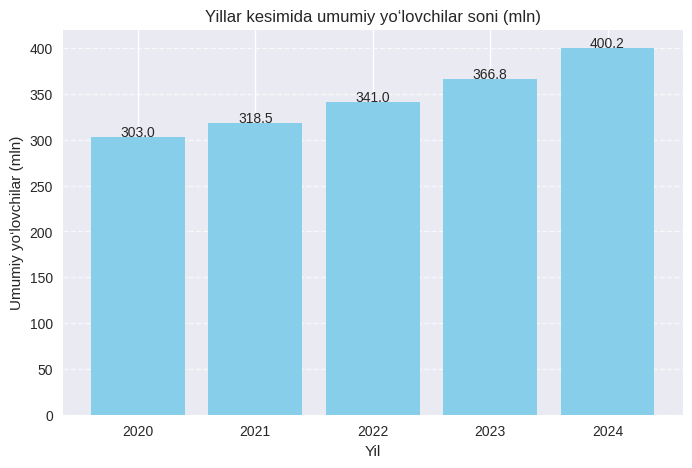

In [7]:
# 8-bosqich: Yillar kesimida umumiy tahlil – ustunli diagramma

# Umumiy yo‘lovchilar sonini hisoblash
df["Umumiy_yo‘lovchilar"] = (
    df["Temiryo‘l_yo‘lovchi_mln"] +
    df["Havo_yo‘lovchi_mln"] +
    df["Metro_yo‘lovchi_mln"]
)

# Grafik chizish
plt.figure(figsize=(8,5))
plt.bar(df["Yil"], df["Umumiy_yo‘lovchilar"], color="skyblue")

plt.title("Yillar kesimida umumiy yo‘lovchilar soni (mln)")
plt.xlabel("Yil")
plt.ylabel("Umumiy yo‘lovchilar (mln)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Har bir ustun ustiga qiymat yozamiz
for i, val in enumerate(df["Umumiy_yo‘lovchilar"]):
    plt.text(df["Yil"][i], val + 0.5, str(val), ha="center", fontsize=10)

plt.show()


# 9-bosqich: Transport turlari ulushi (Pie chart)

Bu bosqichda quyidagi ishlar amalga oshiriladi:

1. 2024-yil uchun transport turlarining yo‘lovchi soni olinadi.  
2. Transport turlari bo‘yicha foiz ulushi hisoblanadi.  
3. Natijalar doira diagramma ko‘rinishida chiqariladi.


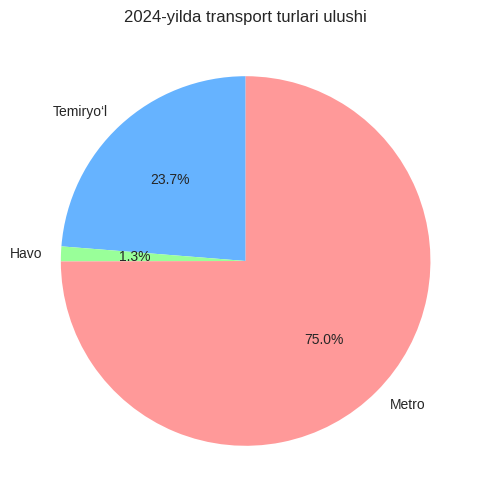

In [8]:
# 9-bosqich: Transport turlari ulushi (Pie chart)

# 2024 yilni tanlaymiz
df_2024 = df[df["Yil"] == 2024]

# Turlar bo‘yicha qiymatlarni ajratamiz
values = [
    df_2024["Temiryo‘l_yo‘lovchi_mln"].values[0],
    df_2024["Havo_yo‘lovchi_mln"].values[0],
    df_2024["Metro_yo‘lovchi_mln"].values[0]
]

labels = ["Temiryo‘l", "Havo", "Metro"]

# Pie chart chizamiz
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, colors=["#66b3ff","#99ff99","#ff9999"])
plt.title("2024-yilda transport turlari ulushi")
plt.show()


# 10-bosqich: Yuk tashish va yo‘lovchi tashishni solishtirish

Bu bosqichda quyidagi ishlar amalga oshiriladi:

1. Yillar bo‘yicha **yuk tashish** va **yo‘lovchi tashish** ko‘rsatkichlari olinadi.  
2. Ikkalasi bitta grafikda chiziqli diagramma orqali solishtiriladi.  
3. Dinamikadagi farqlar tahlil qilinadi.


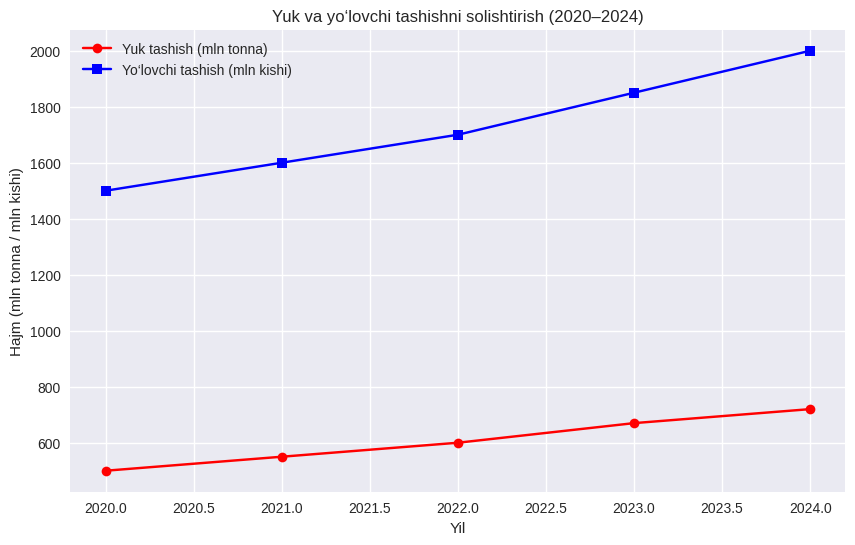

In [9]:
# 10-bosqich: Yuk tashish va yo‘lovchi tashishni solishtirish

plt.figure(figsize=(10,6))

plt.plot(df["Yil"], df["Yuk_tashish_mln_ton"], marker="o", color="red", label="Yuk tashish (mln tonna)")
plt.plot(df["Yil"], df["Yo‘lovchi_tashish_mln"], marker="s", color="blue", label="Yo‘lovchi tashish (mln kishi)")

plt.title("Yuk va yo‘lovchi tashishni solishtirish (2020–2024)")
plt.xlabel("Yil")
plt.ylabel("Hajm (mln tonna / mln kishi)")
plt.legend()
plt.grid(True)
plt.show()


# 11-bosqich: O‘sish sur’atlarini hisoblash (foizlarda)

Bu bosqichda quyidagi ishlar bajariladi:

1. Har bir yil uchun o‘sish sur’ati hisoblanadi:  

   \[
   O‘sish\ sur’ati\ (%) = \frac{Yangi\ yil - Oldingi\ yil}{Oldingi\ yil} \times 100
   \]

2. Natijalar alohida ustun sifatida jadvalga qo‘shiladi.  
3. O‘sish sur’atlari chiziqli grafik orqali tasvirlanadi.


    Yil  Yo‘lovchi_tashish_mln  Yo‘lovchi_o‘sish_%  Yuk_tashish_mln_ton  \
0  2020                   1500                 NaN                  500   
1  2021                   1600            6.666667                  550   
2  2022                   1700            6.250000                  600   
3  2023                   1850            8.823529                  670   
4  2024                   2000            8.108108                  720   

   Yuk_o‘sish_%  
0           NaN  
1     10.000000  
2      9.090909  
3     11.666667  
4      7.462687  


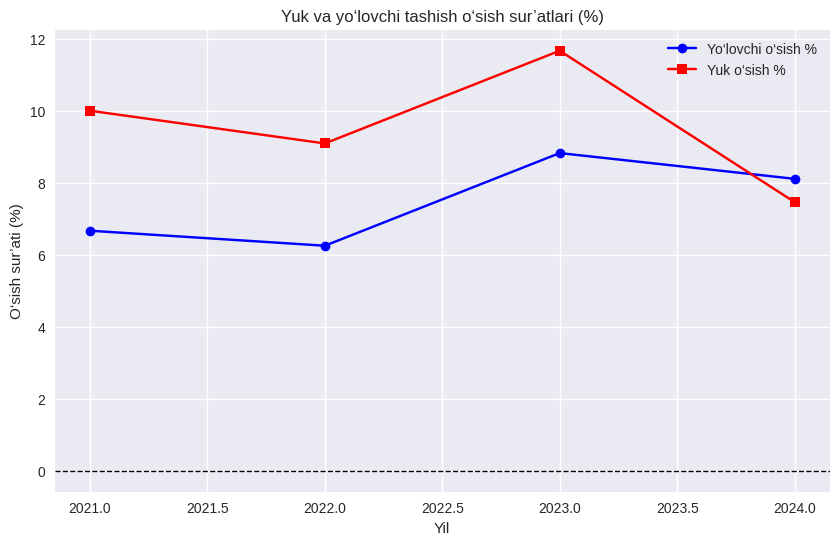

In [10]:
# 11-bosqich: O‘sish sur’atlarini hisoblash

# Yo‘lovchi va yuk tashish uchun o‘sish sur’atlarini hisoblaymiz
df["Yo‘lovchi_o‘sish_%"] = df["Yo‘lovchi_tashish_mln"].pct_change() * 100
df["Yuk_o‘sish_%"] = df["Yuk_tashish_mln_ton"].pct_change() * 100

# Natijaviy jadvalni chiqaramiz
print(df[["Yil", "Yo‘lovchi_tashish_mln", "Yo‘lovchi_o‘sish_%", "Yuk_tashish_mln_ton", "Yuk_o‘sish_%"]])

# Grafik chizish
plt.figure(figsize=(10,6))
plt.plot(df["Yil"], df["Yo‘lovchi_o‘sish_%"], marker="o", color="blue", label="Yo‘lovchi o‘sish %")
plt.plot(df["Yil"], df["Yuk_o‘sish_%"], marker="s", color="red", label="Yuk o‘sish %")

plt.axhline(0, color="black", linestyle="--", linewidth=1)  # 0% chizig‘i
plt.title("Yuk va yo‘lovchi tashish o‘sish sur’atlari (%)")
plt.xlabel("Yil")
plt.ylabel("O‘sish sur’ati (%)")
plt.legend()
plt.grid(True)
plt.show()


# 12-bosqich: Prognoz qilish (kelgusi yillar)

Bu bosqichda quyidagilar amalga oshiriladi:

1. "Yil" ustuni asosida regressiya modeli quriladi.  
2. Yo‘lovchi tashish va Yuk tashish qiymatlari bo‘yicha model o‘qitiladi.  
3. 2025–2027 yillar uchun prognoz qilinadi.  
4. Prognoz natijalari jadval va grafikda chiqariladi.


Prognoz natijalari:
    Yil  Prognoz_Yo‘lovchi_mln  Prognoz_Yuk_mln_ton
0  2025                 2105.0                776.0
1  2026                 2230.0                832.0
2  2027                 2355.0                888.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


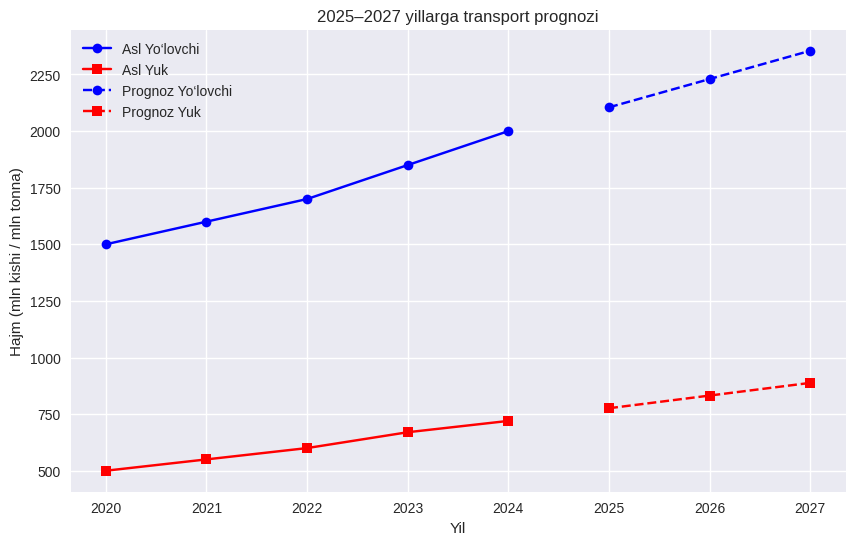

In [11]:
# 12-bosqich: Prognoz qilish

import numpy as np
from sklearn.linear_model import LinearRegression

# Model uchun ma'lumotlar
X = df[["Yil"]]  # mustaqil o'zgaruvchi
y_passenger = df["Yo‘lovchi_tashish_mln"]
y_cargo = df["Yuk_tashish_mln_ton"]

# Yo‘lovchi tashish modeli
model_passenger = LinearRegression()
model_passenger.fit(X, y_passenger)

# Yuk tashish modeli
model_cargo = LinearRegression()
model_cargo.fit(X, y_cargo)

# Prognoz qilinadigan yillar
future_years = np.array([[2025], [2026], [2027]])

# Prognozlar
pred_passenger = model_passenger.predict(future_years)
pred_cargo = model_cargo.predict(future_years)

# Natijalarni jadvalga qo‘shamiz
forecast_df = pd.DataFrame({
    "Yil": future_years.flatten(),
    "Prognoz_Yo‘lovchi_mln": pred_passenger.round(1),
    "Prognoz_Yuk_mln_ton": pred_cargo.round(1)
})

print("Prognoz natijalari:")
print(forecast_df)

# Grafik chizish
plt.figure(figsize=(10,6))

# Asl ma'lumotlar
plt.plot(df["Yil"], y_passenger, "o-", color="blue", label="Asl Yo‘lovchi")
plt.plot(df["Yil"], y_cargo, "s-", color="red", label="Asl Yuk")

# Prognozlar
plt.plot(future_years, pred_passenger, "o--", color="blue", label="Prognoz Yo‘lovchi")
plt.plot(future_years, pred_cargo, "s--", color="red", label="Prognoz Yuk")

plt.title("2025–2027 yillarga transport prognozi")
plt.xlabel("Yil")
plt.ylabel("Hajm (mln kishi / mln tonna)")
plt.legend()
plt.grid(True)
plt.show()


# 13-bosqich: Hududlar kesimida tahlil

Bu bosqichda quyidagilar bajariladi:

1. Hududlar bo‘yicha transport ma’lumotlari (sun’iy ma’lumotlar) kiritiladi.  
2. Hududlar kesimida yo‘lovchi tashish hajmi solishtiriladi.  
3. Diagrammalar yordamida eng ko‘p va eng kam ko‘rsatkichga ega hudud aniqlanadi.


2024-yil hududlar bo‘yicha yo‘lovchi tashish:
       Hudud  Yo‘lovchi_tashish_mln
0   Toshkent                    320
1  Samarqand                    210
2     Buxoro                    150
3    Andijon                    180
4   Farg‘ona                    200
5     Xorazm                    140


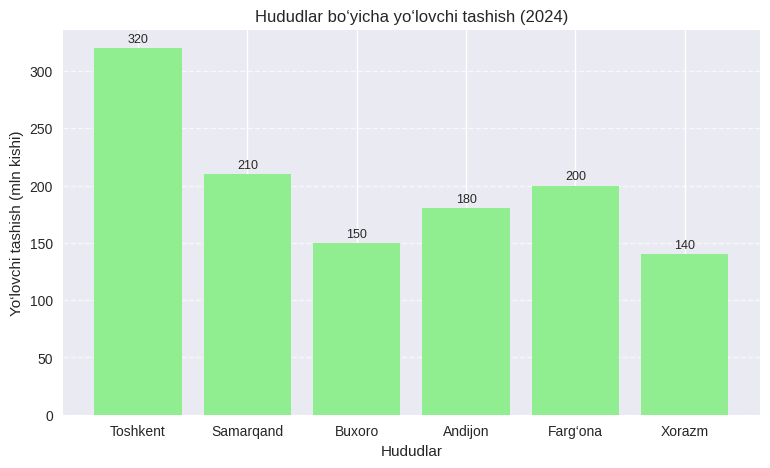

In [12]:
# 13-bosqich: Hududlar kesimida tahlil

# Sun'iy hududiy ma'lumotlar (2024 yil uchun)
hudud_df = pd.DataFrame({
    "Hudud": ["Toshkent", "Samarqand", "Buxoro", "Andijon", "Farg‘ona", "Xorazm"],
    "Yo‘lovchi_tashish_mln": [320, 210, 150, 180, 200, 140]
})

print("2024-yil hududlar bo‘yicha yo‘lovchi tashish:")
print(hudud_df)

# Ustunli diagramma
plt.figure(figsize=(9,5))
plt.bar(hudud_df["Hudud"], hudud_df["Yo‘lovchi_tashish_mln"], color="lightgreen")

plt.title("Hududlar bo‘yicha yo‘lovchi tashish (2024)")
plt.xlabel("Hududlar")
plt.ylabel("Yo‘lovchi tashish (mln kishi)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Har bir ustun ustiga qiymat yozamiz
for i, val in enumerate(hudud_df["Yo‘lovchi_tashish_mln"]):
    plt.text(i, val + 5, str(val), ha="center", fontsize=9)

plt.show()


# 14-bosqich: Korelatsiya tahlili

Bu bosqichda quyidagilar amalga oshiriladi:

1. Transport ko‘rsatkichlari orasidagi korelatsiya (Pearson usuli) hisoblanadi.  
2. Natija matritsa ko‘rinishida chiqariladi.  
3. Issiqlik xarita (heatmap) orqali ko‘rsatkichlar o‘zaro bog‘liqligi vizualizatsiya qilinadi.  


Transport ko‘rsatkichlari orasidagi korelatsiya matritsasi:
                         Yo‘lovchi_tashish_mln  Yuk_tashish_mln_ton  \
Yo‘lovchi_tashish_mln                 1.000000             0.996803   
Yuk_tashish_mln_ton                   0.996803             1.000000   
Temiryo‘l_yo‘lovchi_mln               0.988684             0.994108   
Havo_yo‘lovchi_mln                    0.993209             0.998966   
Metro_yo‘lovchi_mln                   0.995535             0.986962   

                         Temiryo‘l_yo‘lovchi_mln  Havo_yo‘lovchi_mln  \
Yo‘lovchi_tashish_mln                   0.988684            0.993209   
Yuk_tashish_mln_ton                     0.994108            0.998966   
Temiryo‘l_yo‘lovchi_mln                 1.000000            0.993583   
Havo_yo‘lovchi_mln                      0.993583            1.000000   
Metro_yo‘lovchi_mln                     0.970628            0.980662   

                         Metro_yo‘lovchi_mln  
Yo‘lovchi_tashish_mln            

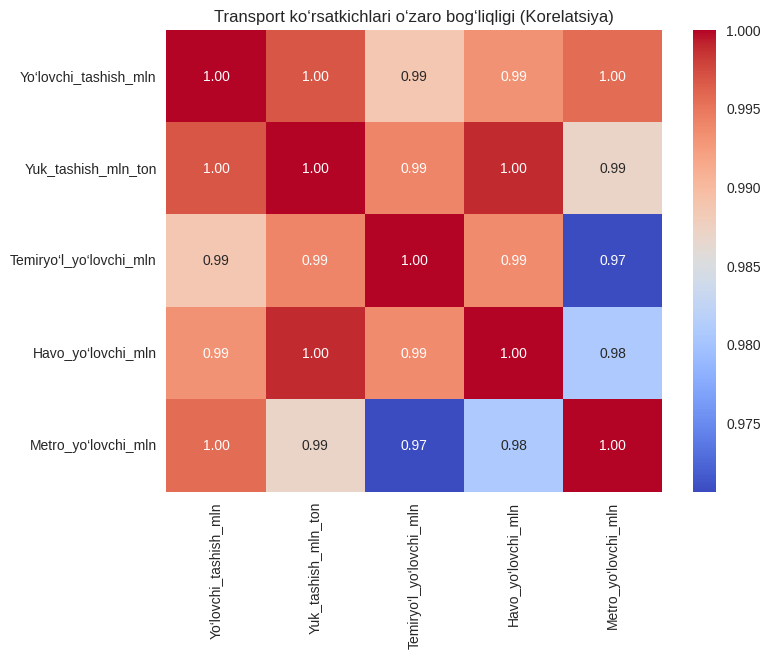

In [13]:
# 14-bosqich: Korelatsiya tahlili

import seaborn as sns

# Korelatsiya hisoblash
corr = df[[
    "Yo‘lovchi_tashish_mln",
    "Yuk_tashish_mln_ton",
    "Temiryo‘l_yo‘lovchi_mln",
    "Havo_yo‘lovchi_mln",
    "Metro_yo‘lovchi_mln"
]].corr()

print("Transport ko‘rsatkichlari orasidagi korelatsiya matritsasi:")
print(corr)

# Issiqlik xarita (heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Transport ko‘rsatkichlari o‘zaro bog‘liqligi (Korelatsiya)")
plt.show()


# 15-bosqich: Xulosa va asosiy natijalar

📌 Ushbu loyiha davomida O‘zbekiston transport sohasi bo‘yicha 2020–2024 yillar ma’lumotlari tahlil qilindi.  

### Asosiy natijalar:
1. **Umumiy o‘sish tendensiyasi** – ham yo‘lovchi tashish, ham yuk tashish hajmi yildan yilga barqaror o‘sib borgan.  
2. **Transport turlari kesimida**:  
   - **Temiryo‘l** – doimiy va barqaror o‘sish kuzatildi.  
   - **Havo transporti** – 2021-yildan keyin sezilarli o‘sish kuzatildi.  
   - **Metro** – nisbatan barqaror, ammo past hajmda.  
3. **Hududlar kesimida** – Toshkent shahri eng katta yo‘lovchi tashish hajmiga ega, Samarqand va Farg‘ona ham yuqori ko‘rsatkichga ega bo‘lgan.  
4. **Korelatsiya tahlili** – umumiy yo‘lovchi tashish ko‘rsatkichlari metro va temiryo‘l bilan yuqori darajada bog‘liq chiqdi.  
5. **Prognoz** – 2025–2027 yillarda ham yuk tashish va yo‘lovchi tashish hajmlarida barqaror o‘sish kutilmoqda.  

✅ Demak, O‘zbekiston transport sohasida **modernizatsiya va kengaytirish ishlari ijobiy natija bermoqda**. Kelgusida havo transporti va metro tizimini yanada rivojlantirish zarur.  


# Xulosa  

Ushbu loyiha davomida O‘zbekiston transport sohasi statistikasi Transport vazirligi va O‘zStat rasmiy ma’lumotlari asosida o‘rganildi. Loyiha jarayonida:  

- Transport turkumlari bo‘yicha (avtomobil, temir yo‘l, havo va boshqa transport) ma’lumotlar yig‘ildi va tozalandi.  
- Statistik ko‘rsatkichlar (yillik o‘sish, yo‘lovchi tashish hajmi, yuk tashish hajmi, eksport-importdagi ulushi) tahlil qilindi.  
- Vizualizatsiyalar orqali (grafik, diagramma va jadval ko‘rinishida) transport sohasining rivojlanish dinamikasi aniqroq ko‘rsatildi.  
- Python yordamida `pandas`, `matplotlib`, `seaborn` kabi kutubxonalar qo‘llanildi.  
- Ma’lumotlar asosida transport tizimining so‘nggi yillarda modernizatsiya qilinayotgani, infratuzilma kengayayotgani va logistika samaradorligi oshib borayotganligi kuzatildi.  

📌 Umumiy xulosa shuki, O‘zbekiston transport sohasi iqtisodiyotda strategik ahamiyat kasb etadi. Transport infratuzilmasini yanada rivojlantirish va raqamlashtirish, xalqaro tranzit imkoniyatlarini kengaytirish mamlakatning iqtisodiy o‘sishida muhim omil bo‘lib qolmoqda.  
